In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
from bs4 import BeautifulSoup


In [2]:
# Load dataset
train_df = pd.read_csv(
    "/PersonalProjects/Predict_Product_Type_HackerEarth_Challenge_07_11_22/data/train.csv")
train_df.head()


,File_Name,Product
0,PROJ0x130f.html,AI
1,PROJ0x61c1.html,Truck
2,PROJ0x520d.html,Truck
3,PROJ0x1d31.html,Medical devices
4,PROJ0x77de.html,antivirus-security


In [5]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13452 entries, 0 to 13451
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File_Name  13452 non-null  object
 1   Product    13452 non-null  object
dtypes: object(2)
memory usage: 210.3+ KB


In [6]:
train_df.describe()


,File_Name,Product
count,13452,13452
unique,13452,13
top,PROJ0x130f.html,AI
freq,1,1543


In [7]:
# Lets find unique PRoducts
train_df['Product'].unique()


array(['AI', 'Truck', 'Medical devices', 'antivirus-security', 'Hydro',
       'Organicfood', 'charcoal', 'Kids toys', 'Fuel', 'Gaming hardware',
       'Bike', 'allopathy', 'Solar'], dtype=object)

<AxesSubplot: xlabel='count', ylabel='Product'>

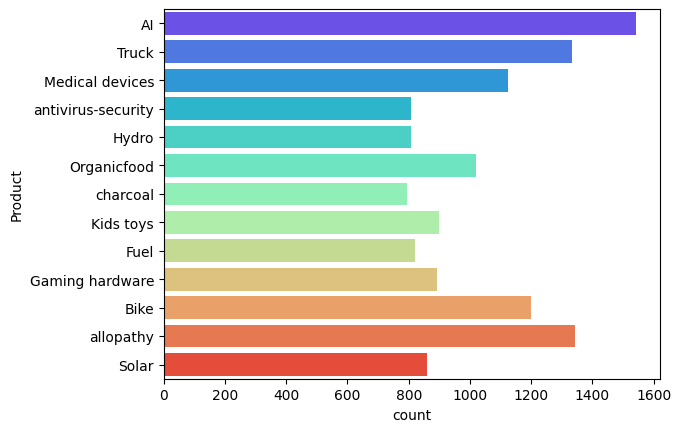

In [8]:
# Lets plot to see the distribution
sns.countplot(y='Product', data=train_df, palette='rainbow')


In [9]:
# Creting function for reading HTML file.
def read_html_file(file_name):
    base_path = "/PersonalProjects/Predict_Product_Type_HackerEarth_Challenge_07_11_22/data/train/"
    #file_content = pd.read_html(base_path+file_name)
    file_content = BeautifulSoup(open(base_path+file_name, 'r').read())
    # extract_text_from_html():

    return file_content


In [10]:
read_html_file('PROJ0x130f.html')


<!DOCTYPE html>
<html>
<head>
<title> Company information Website </title>
</head>
<body>
<h1> Company information </h1>
<h2> General Details </h2>
<p> Company is based out of: <b>Christmas Island</b> </p>
<p> Company Sector: <b>Public_sector</b></p>
<p> Number of employee:<b>nan</b> </p><p>
</p><p> <b>Company background</b> </p>
<p> More complex computations may involve many operations and data elements together. Computer software includes computer programs, libraries and related non-executable data, such as online documentation or digital media.</p>
<h2> Finance Details </h2>
<p> Company Revenue ( in Milions ): <b>None</b></p>
<p> Net Valuation of the company: <b>23367.69780624008</b></p>
<p> Current Share price (USD): <b>58348.5</b> </p>
</body>
</html>

In [44]:
# Create a DataFrame of the values from HTML page
content_df = pd.DataFrame(columns=['File_Name', 'Location', 'Sector',
                          'Number_of_Employees', 'Revenue', 'Valuation', 'Share_Price', 'Background'])
content_df


,File_Name,Location,Sector,Number_of_Employees,Revenue,Valuation,Share_Price,Background


In [41]:
file_cont = read_html_file('PROJ0x130f.html')
description = file_cont.find_all("p")
print(description[5])


<p> More complex computations may involve many operations and data elements together. Computer software includes computer programs, libraries and related non-executable data, such as online documentation or digital media.</p>


In [36]:
file_cont = read_html_file('PROJ0x130f.html')
description = file_cont.find_all("b")
print(description)


[<b>Christmas Island</b>, <b>Public_sector</b>, <b>nan</b>, <b>Company background</b>, <b>None</b>, <b>23367.69780624008</b>, <b>58348.5</b>]


In [45]:
# Extract Text from HTML files
def extract_text_from_html():
    file_content = read_html_file('PROJ0x130f.html')
    content_list = []

    # Extract all the deatisl from HTML file
    elements = file_content.find_all("b")
    for element in elements:
        #print(element.text.strip())
        content_list.append(element.text.strip())

    # Extract Company background from HTML file
    elemets = file_content.find_all("p")
    #print(elemets[5].text.strip())
    content_list.append(elemets[5].text.strip())

    # Remove the unwanted value like text Company background
    del content_list[3]

    return content_list


In [46]:
extract_text_from_html()


['Christmas Island',
 'Public_sector',
 'nan',
 'None',
 '23367.69780624008',
 '58348.5',
 'More complex computations may involve many operations and data elements together. Computer software includes computer programs, libraries and related non-executable data, such as online documentation or digital media.']